# Simple ML introducion

Written by:
- Manuel Szewc (School of Physics, University of Cincinnati)
- Philip Ilten (School of Physics, University of Cincinnati)
$\renewcommand{\gtrsim}{\raisebox{-2mm}{\hspace{1mm}$\stackrel{>}{\sim}$\hspace{1mm}}}\renewcommand{\lessim}{\raisebox{-2mm}{\hspace{1mm}$\stackrel{<}{\sim}$\hspace{1mm}}}\renewcommand{\as}{\alpha_{\mathrm{s}}}\renewcommand{\aem}{\alpha_{\mathrm{em}}}\renewcommand{\kT}{k_{\perp}}\renewcommand{\pT}{p_{\perp}}\renewcommand{\pTs}{p^2_{\perp}}\renewcommand{\pTe}{\p_{\perp\mrm{evol}}}\renewcommand{\pTse}{\p^2_{\perp\mrm{evol}}}\renewcommand{\pTmin}{p_{\perp\mathrm{min}}}\renewcommand{\pTsmim}{p^2_{\perp\mathrm{min}}}\renewcommand{\pTmax}{p_{\perp\mathrm{max}}}\renewcommand{\pTsmax}{p^2_{\perp\mathrm{max}}}\renewcommand{\pTL}{p_{\perp\mathrm{L}}}\renewcommand{\pTD}{p_{\perp\mathrm{D}}}\renewcommand{\pTA}{p_{\perp\mathrm{A}}}\renewcommand{\pTsL}{p^2_{\perp\mathrm{L}}}\renewcommand{\pTsD}{p^2_{\perp\mathrm{D}}}\renewcommand{\pTsA}{p^2_{\perp\mathrm{A}}}\renewcommand{\pTo}{p_{\perp 0}}\renewcommand{\shat}{\hat{s}}\renewcommand{\a}{{\mathrm a}}\renewcommand{\b}{{\mathrm b}}\renewcommand{\c}{{\mathrm c}}\renewcommand{\d}{{\mathrm d}}\renewcommand{\e}{{\mathrm e}}\renewcommand{\f}{{\mathrm f}}\renewcommand{\g}{{\mathrm g}}\renewcommand{\hrm}{{\mathrm h}}\renewcommand{\lrm}{{\mathrm l}}\renewcommand{\n}{{\mathrm n}}\renewcommand{\p}{{\mathrm p}}\renewcommand{\q}{{\mathrm q}}\renewcommand{\s}{{\mathrm s}}\renewcommand{\t}{{\mathrm t}}\renewcommand{\u}{{\mathrm u}}\renewcommand{\A}{{\mathrm A}}\renewcommand{\B}{{\mathrm B}}\renewcommand{\D}{{\mathrm D}}\renewcommand{\F}{{\mathrm F}}\renewcommand{\H}{{\mathrm H}}\renewcommand{\J}{{\mathrm J}}\renewcommand{\K}{{\mathrm K}}\renewcommand{\L}{{\mathrm L}}\renewcommand{\Q}{{\mathrm Q}}\renewcommand{\R}{{\mathrm R}}\renewcommand{\T}{{\mathrm T}}\renewcommand{\W}{{\mathrm W}}\renewcommand{\Z}{{\mathrm Z}}\renewcommand{\bbar}{\overline{\mathrm b}}\renewcommand{\cbar}{\overline{\mathrm c}}\renewcommand{\dbar}{\overline{\mathrm d}}\renewcommand{\fbar}{\overline{\mathrm f}}\renewcommand{\pbar}{\overline{\mathrm p}}\renewcommand{\qbar}{\overline{\mathrm q}}\renewcommand{\rbar}{\overline{\mathrm{r}}}\renewcommand{\sbar}{\overline{\mathrm s}}\renewcommand{\tbar}{\overline{\mathrm t}}\renewcommand{\ubar}{\overline{\mathrm u}}\renewcommand{\Bbar}{\overline{\mathrm B}}\renewcommand{\Fbar}{\overline{\mathrm F}}\renewcommand{\Qbar}{\overline{\mathrm Q}}\renewcommand{\tms}{{t_{\mathrm{\tiny MS}}}}\renewcommand{\Oas}[1]{{\mathcal{O}\left(\as^{#1}\right)}}$

## Introduction

This notebook wants to implement simple Machine Learning algorithms for classification

In [1]:
import os

# To generate data and handle arrays
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Classification

In classification problems, we are interested in predicting a class asignment $\mathcal{C}_{k}$ to a measurement $x$. The training data consists of paired measurements and class labels $x_{\text{train}},t_{\text{train}}$.

There are three types of classification approaches:

* Discriminant functions, where we learn a function $y(x,w)$ that defines the border between classes. For the binary case, and using $t \in \{-1,1\}$ , this corresponds to definen a threshold $y_{0}$ (usually zero) such that if $y(x,w)>y_{0}$, $t = 1$ and $t=-1$ otherwise. This is the case for `Perceptron` and `Support Vector Machines` among others. `DecisionTrees` can be thought of in these terms as well, although they can also estimate probabilities.
* Discriminative models, where we learn a function $y(x,w)$ that encodes the probability of a class asignment given $x$, $p(\mathcal{C}_{k}|x)$. A class asignment can be made by selecting the class which maximizes the probability, although other criteria can be applied as well. `LogisticRegressors` and simple `Neural Network Classifiers` are examples of this.
* Generative models, where we learn a function $y(x,w)$ that encodes the probability of $x$ per class, $p(x|\mathcal{C}_{k})$. A class asignment can be made by estimating the per class probabilities using Bayes' rule and selecting the class which maximizes this probability. `Naive Bayes` classifiers or conditional density estimators are examples of this.


Let's focus more on discriminative models. Here, we are interested in the per-class probability, which is a **posterior** over class asignments.  For the binary case, we only need to specifiy $p(\mathcal{C}_{1}|x)$ since $p(\mathcal{C}_{2}|x)=1-p(\mathcal{C}_{1}|x)$. We deal with the multiclass problem further down the notebook.

For the binary case, we compute

$$p(\mathcal{C}_{1}|x)=\frac{p(x|\mathcal{C}_{1})p(\mathcal{C}_{1})}{p(x|\mathcal{C}_{1})p(\mathcal{C}_{1})+p(x|\mathcal{C}_{2})p(\mathcal{C}_{2})}=\frac{1}{1+\frac{p(x|\mathcal{C}_{2})p(\mathcal{C}_{2})}{p(x|\mathcal{C}_{1})p(\mathcal{C}_{1})}}$$

Defining the **log-odds ratio** 

$$a=\text{Ln }\frac{p(x|\mathcal{C}_{1})p(\mathcal{C}_{1})}{p(x|\mathcal{C}_{2})p(\mathcal{C}_{2})}=\text{Ln }\frac{p(\mathcal{C}_{1}|x)}{p(\mathcal{C}_{2}|x)}$$

we have that

$$p(\mathcal{C}_{1}|x)=\frac{1}{1+\text{e}^{-a}}=\sigma(a)$$

where $\sigma(a)$ is the  **sigmoid function**. Thus, the binary problem is reduced to computing the log-odds ratio between the two classes.

Text(0.5, 0, 'Log odds')

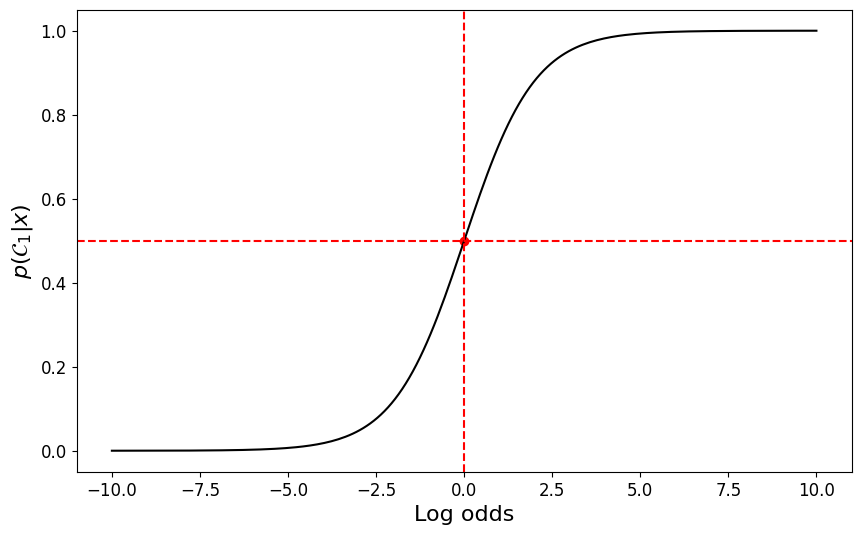

In [2]:
prob = np.linspace(-10, 10, 200)

a_vals = 1 / (1 + np.exp(-prob))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(prob, a_vals, color='black')
ax.scatter(0.0, 0.5, color='red')
ax.axvline(0.0, linestyle="dashed",color='red')
ax.axhline(0.5, linestyle="dashed",color='red')
ax.set_ylabel(r'$p(\mathcal{C}_{1}|x)$', fontsize=16)
ax.set_xlabel('Log odds', fontsize=16)

We see how the sigmoid function is a function lying in $[0,1]$, even as the log odds ratio takes values in $(-\infty,\infty)$. This is necessary since we're interpreting it as a probability.

A particularly important point is where the two classes are equally likely. There, the log odds ratio is 1 and the per class probability is 0.5, as it should. In general, this is selected as the decision boundary.

Two useful properties of the sigmoid function are:

$$\sigma(-a)=1-\sigma(a)$$

and

$$\frac{d\sigma}{da}=\sigma(1-\sigma)$$

For the $K$ class case, we can generalize the sigmoid to the normalized exponential or **softmax** function:

$$p(\mathcal{C}_{k}|x)=\frac{p(x|\mathcal{C}_{k})p(\mathcal{C}_{k})}{\sum_{l=1}^{K}p(x|\mathcal{C}_{l})p(\mathcal{C}_{l})}=\frac{e^{a_{k}}}{\sum_{l=1}^{K}e^{a_{l}}}$$

where $a_{k}=\text{Ln }p(x|\mathcal{C}_{k})p(\mathcal{C}_{k})$

### Logistic Regression

The simplest discriminative classifier is the `Logistic Regressor`. For the two class case, we model the per class probability posterior as

$$p(\mathcal{C}_{1}|\vec{x})=y(\vec{x},\vec{w})=\sigma(\vec{w}^{T}\vec{\phi}(\vec{x}))$$

$$p(\mathcal{C}_{0}|\vec{x})=1-y(\vec{x},\vec{w})=1-\sigma(\vec{w}^{T}\vec{\phi}(\vec{x}))=\sigma(-\vec{w}^{T}\vec{\phi}(\vec{x}))$$

We already have two features of note:

- $\vec{w}^{T}\vec{\phi}(\vec{x})$ acts as the decision function in a discriminant approach. In particular, $\vec{w}^{T}\vec{\phi}(\vec{x})=0$ defines the equi-probability surface.
- The sigmoid is a **non-linear activation function**. This feature, necessary to transform a linear model into a probability estimate, will be very present in `Neural Networks` even for regression for different reasons (the universal approximation is ensured by internal non-linear activation functions between neuron layers).

As in the generalized linear models for regression,  $\vec{\phi}$ includes in principle the bias with $\phi_{0}(\vec{x})=1$.

As with regression, we can group all training pairs into a design matrix

$$\Phi=\begin{pmatrix}\vec{\phi}^{T}(\vec{x}_{1}) \\ ... \\ \vec{\phi}^{T}(\vec{x}_{N})\end{pmatrix}$$

obtaining 

$$\sigma(\Phi\cdot \vec{w}) = \begin{pmatrix}\sigma(\vec{\phi}^{T}(\vec{x}_{1}) \cdot\vec{w})\\ ... \\ \sigma(\vec{\phi}^{T}(\vec{x}_{N})\cdot\vec{w})\end{pmatrix}=\begin{pmatrix}\sigma((\vec{w}^{T} \cdot\vec{\phi}(\vec{x}_{1}))^T)\\ ... \\ \sigma((\vec{w}^{T} \cdot\vec{\phi}(\vec{x}_{N}))^T)\end{pmatrix}=\begin{pmatrix}y(\vec{x}_{1},\vec{w})\\ ... \\ y(\vec{x}_{N},\vec{w})\end{pmatrix}$$

Now we need a criteria to obtain the best coefficients $\vec{w}$. As in regression, a natural choice is to maximize the likelhiood (or minmize the negative log-likelihood). For a binary variable, we have only two possible results which we can label as success or failure or heads and tails. Assuming the points are independent and identically distributed, each label has a Bernoulli distribution

$$p(\text{t}|\vec{x},\vec{w})=p(t|\mu)=\mu^{t}(1-\mu)^{1-t}$$

where $\mu=p(\mathcal{C}_{1}|\vec{x})$ is the success probability, which is exactly what we're trying to model!

Thus, for a dataset $\vec{x}_{n}$, with $n=1,..,N$ the likelihood is

$$\mathcal{L}(\vec{w})=p(\text{T}|X,\vec{w})=\prod_{n=1}^{N}y^{t_n}_{n}(1-y_{n})^{1-t_n}$$

where $y_{n}=y(x_{n},\vec{w})$. Again, the logarithm is easier to handle

$$\ln \mathcal{L}(\vec{w})=\sum_{n=1}^{N}(t_{n}\ln y_{n}+(1-t_{n})\ln (1-y_{n}))$$

Again we can define an error by taking the negative log-likelihood. This is called the **binary cross-entropy** (BCE) between $t$ and $y$

$$E(\vec{w})=-\sum_{n=1}^{N}(t_{n}\ln y_{n}+(1-t_{n})\ln (1-y_{n}))$$

We can see how BCE forces the right behaviour into the model:

If $t_{n}=1$, we care about $\ln y_{n}$. Thus, $y_{n}$ needs to be close to 1 to minimize the BCE.

If $t_{n}=0$, we care about $\ln (1-y_{n})$. Thus, $y_{n}$ needs to be close to 0 to minimize the BCE.

Just a reminder, $y_{n}$ is not meant to match $t_{n}$ but $p(t_{n}|\vec{x}_{n},\vec{w})$. Thus, we also seek a degree of confidence to be embedded into the model.



To obtain useful estimates, we need to be able to minimize the BCE with respect to the parameters $\vec{w}$. 

For logistic regression, the problem is not as easy as it was for linear regression due to the presence of the logarithms and the sigmoid function. However, we can still solve this numerically. A particularly good choice is the Iterative Reweighted Least Squares or IRLS, which considers a Newton-Ralphson update for step $i$:

$$\vec{w}^{i}=\vec{w}^{i-1}-\mathrm{H}^{-1}\nabla E(\vec{w})|_{\vec{w}^{i-1}}$$

where $\vec{w}^{0}$ is the initialized vector of parameters, $\nabla E(\vec{w})$ is the BCE gradient with respect to the parameters and $\mathrm{H}$ is the Hessian matrix. For a logistic regressor where we combine a linear model with a sigmoide function, this simplifies to a set of **iterative normal equations**:

$$\vec{w}^{i}=\Phi^{T}\mathrm{R}\Phi^{-1}\Phi^{T}\mathrm{R}\mathrm{z}$$

where $\Phi$ is the design matrix, $\mathrm{R}$ a diagonal matrix whose elements are $y_{n}(1-y_{n})$ and $\mathrm{z}$ is

$\mathrm{z}=\Phi\vec{w}^{i-1}-\mathrm{R}^{-1}(\mathrm{Y}-\mathrm{T})$

where $\mathrm{Y}$ e $\mathrm{T}$ are the prediction and label vectors. One should remember that $\mathrm{R}$, $\mathrm{z}$ and $\mathrm{Y}$ are all functions of $\vec{w}^{-1}$.


We could have applied such an algorithm to linear regression, and observed how it converge to the closed solution in 1 step. Additionally, be sure to notice that is an iterative algorithm but it is not sequential since it considers the full dataset at each step.

### Exercise

Let's consider the following dataset

In [12]:
size1 = 250
mu1 = [0, 0]
cov1 = [[1, 0.95],[0.95, 1]]

size2 = 200
mu2 = [-1, 0.5]
cov2 = [[1, 0.8],[0.8, 1]]

np.random.seed(20200922)
# Sample classes
xc1 = np.random.multivariate_normal(mean=mu1, cov=cov1,size=size1).T
xc2 = np.random.multivariate_normal(mean=mu2, cov=cov2,size=size2).T

print(xc1.shape, xc2.shape)

(2, 250) (2, 200)


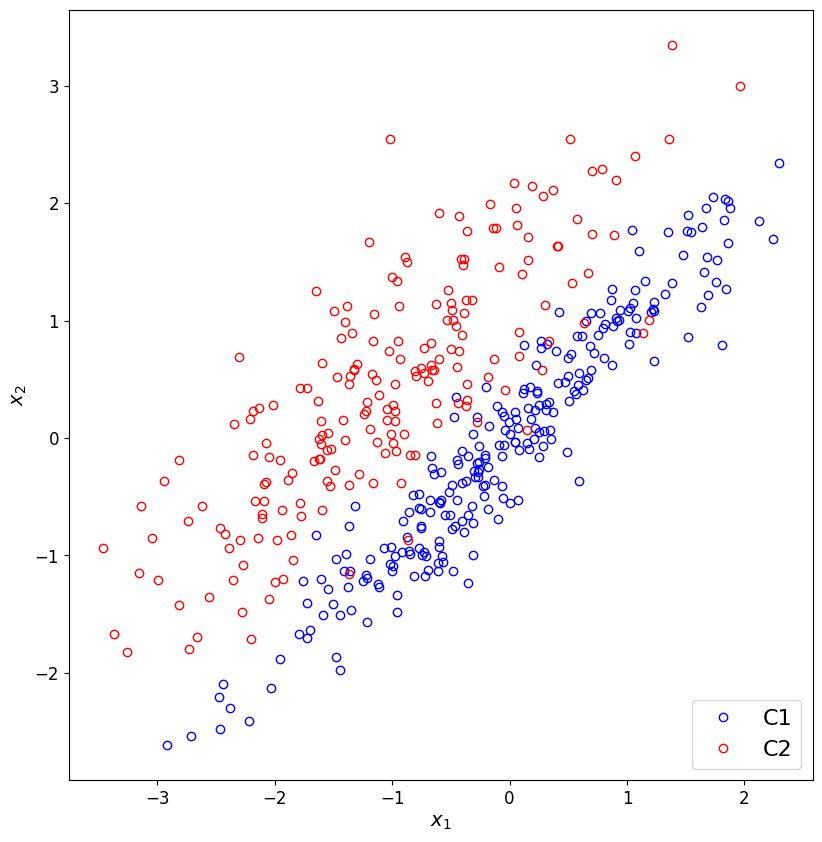

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.plot(*xc1, 'ob', mfc='None', label='C1')
ax.plot(*xc2, 'or', mfc='None', label='C2')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc='lower right', fontsize=16)
ax.set_aspect('equal')

In [14]:
X = np.hstack([xc1, xc2]).T

tc1 = np.ones(xc1.shape[1])
tc2 = np.zeros(xc2.shape[1])

t = np.concatenate([tc1, tc2]).reshape(-1,1)

Using this sigmoid function

In [15]:
def sigmoid(logoddsvec):
    return 1/(1+np.exp(-logoddsvec))

Train a Logistic Regressor, print the best parameters, compute the predicted probability per measurement and plot it as a function of ($x_1,x_2$).


In [16]:
###SOLUTION_START

Phi=np.hstack([np.ones(len(X)).reshape(-1,1), X])# design matrix
#print(Phi.shape)
w=[np.ones(3).reshape(-1,1)]#initialize weights
n_iter = 13 #define the number of iterations to play with
for i in range(n_iter):
  try:
    # obtain the initial ys using my weights, the design matrix and the activation function
    y = sigmoid(np.dot(Phi, w[-1]))
    #print(y.shape)
    #R=np.diag(list(map(lambda yy: yy*(1-yy), y[:,0])))#matrix R
    R = np.diag(y[:,0]*(1-y[:,0]))#matrix R
    #print(R.shape)
    aux_matrix = np.linalg.solve(R,(y-t)) # necessary auxiliar step
    z = np.dot(Phi,w[-1])-aux_matrix #matrix z
    aux_matrix_2 = np.dot(np.dot(Phi.T,R),Phi)
    aux_matrix_3 = np.dot(np.dot(Phi.T,R),z)
    w_aux=np.linalg.solve(aux_matrix_2,aux_matrix_3)
    if(1==1):#convergence criterion
      w.append(w_aux)
    else:
      break
  except:
    break

Veamos como evolucionan los coeficientes

In [17]:
for w_val in w:
  print(w_val[:,0])

[1. 1. 1.]
[ 1.11327092  1.9107308  -4.22815661]
[ 1.98035375  2.70342991 -0.82465731]
[ 1.6519721   2.35792261 -2.97076511]
[ 2.51803921  3.83821506 -4.02416907]
[ 3.27800658  5.28293694 -5.29196333]
[ 3.82769348  6.38715878 -6.31643441]
[ 4.05052504  6.84024367 -6.74704523]
[ 4.07718386  6.89409033 -6.79880813]
[ 4.0775072   6.89473719 -6.79943456]
[ 4.07750725  6.89473728 -6.79943465]
[ 4.07750725  6.89473728 -6.79943465]
[ 4.07750725  6.89473728 -6.79943465]
[ 4.07750725  6.89473728 -6.79943465]


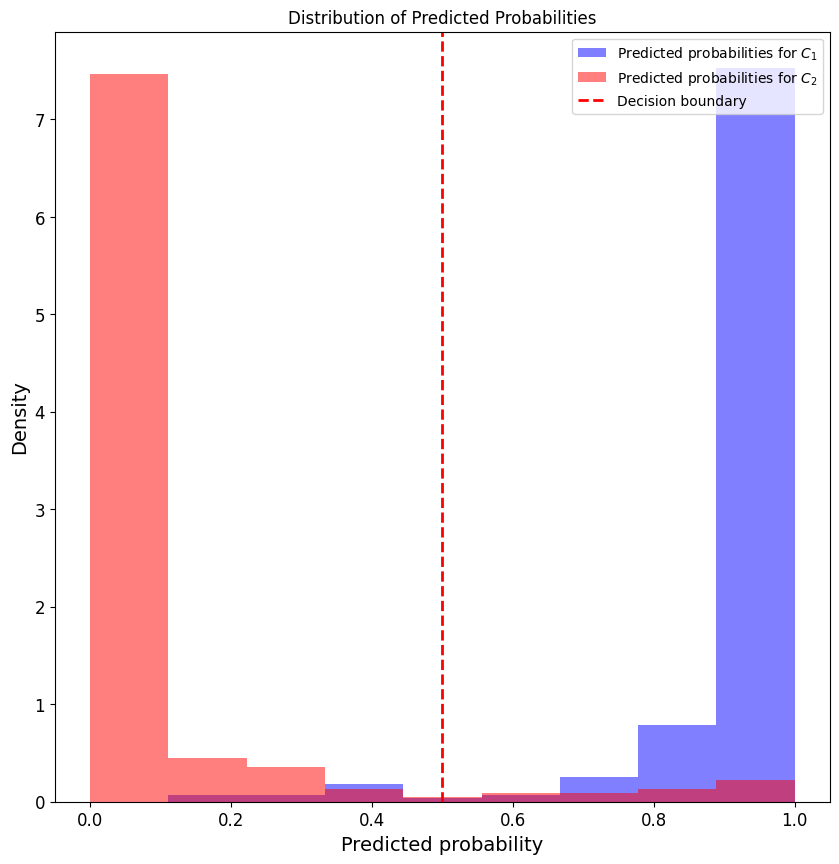

In [18]:
W = w[-1]
y = sigmoid(np.dot(Phi,W))
fig = plt.figure(figsize=(10, 10))
plt.hist(y[t[:,0] > 0.5], bins=np.linspace(0,1,10),density=True, alpha=0.5, color='blue', label='Predicted probabilities for $C_1$')
plt.hist(y[t[:,0] <= 0.5], bins=np.linspace(0,1,10),density=True, alpha=0.5, color='red', label='Predicted probabilities for $C_2$')
plt.axvline(0.5, color='red', linestyle='dashed', linewidth=2, label='Decision boundary')
plt.xlabel('Predicted probability')
plt.ylabel('Density')
plt.title('Distribution of Predicted Probabilities')
plt.legend()
plt.show()

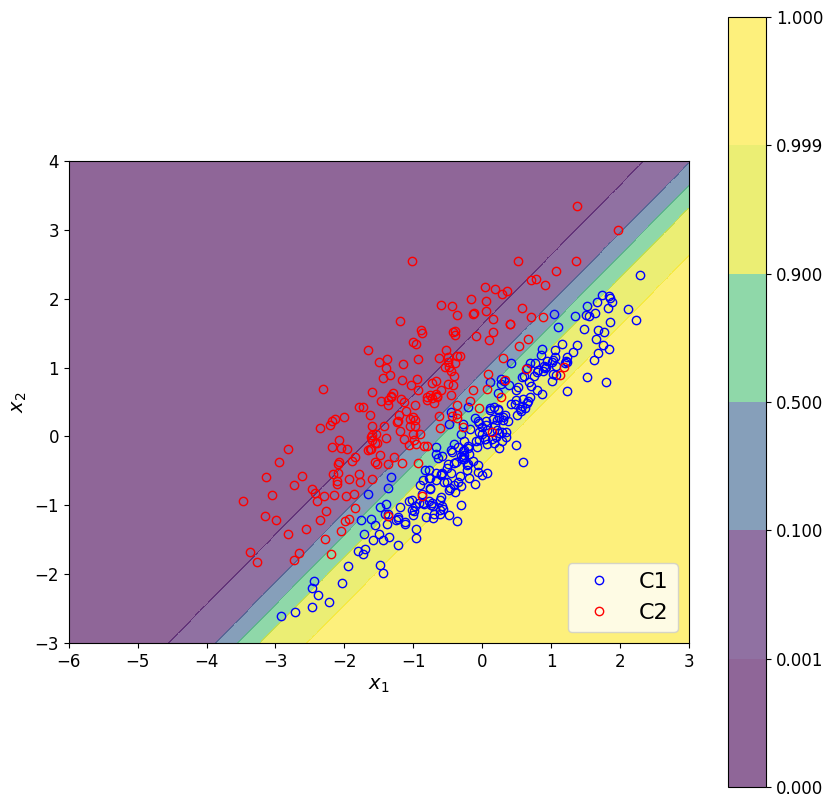

In [19]:
x1 = np.linspace(-6.0,3.0,100)
x2 = np.linspace(-3.0,4.0,100)
X1toplot, X2toplot = np.meshgrid(x1,x2)
#plt.xlim(0.0,0.2)
#plt.ylim(0.0,0.2)
Z=(np.asarray([sigmoid(np.dot(W.T,[1.0,el[0],el[1]])) for el in np.c_[X1toplot.ravel(), X2toplot.ravel()]])).reshape(X1toplot.shape)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.plot(*xc1, 'ob', mfc='None', label='C1')
ax.plot(*xc2, 'or', mfc='None', label='C2')
contour = ax.contourf(X1toplot,X2toplot,Z,levels=[0.0,0.001,0.1,0.5,0.9,0.999,1.0],alpha=0.6)
plt.colorbar(contour,ax=ax)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc='lower right', fontsize=16)
ax.set_aspect('equal')

In [20]:
###SOLUTION_STOP

### Metrics

Once we have a model, we need a criteria for class asignment. For the binary case, a natural choice is to assign $x\in\mathcal{C}_1$ if

$$p(\mathcal{C}_{1}|x)\geq p(\mathcal{C}_{2}|x)$$

Since the two probabilities add up to one, this criteria sets the **decision boundary** at

$$p(\mathcal{C}_{1}|x)=0.5$$

This choice can be shown to maximize the **accuracy** given by

$$\mathrm{Accuracy = }\frac{\mathrm{TP}+\mathrm{TN}}{\mathrm{TP}+\mathrm{FP}+\mathrm{TN}+\mathrm{FN}}$$

where TP, TN, FP and FN stand for True Positive, True Negative, False Positive and False Negative *ie* the fractions of correctly and incorrectly assigned measurements per class (positive is $C_{1}$, negative is $C_{2}$).

That is, we're minimizing the **total misasignments**.

Two other very useful metris are **precision** and **recall**:

$$\mathrm{Precision = }\frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FP}}$$

$$\mathrm{Recall = }\frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}}$$

Precision captures how many positive samples are actually positive, and recall relates how many positive samples are we tagging as positives. 

All of these can be derived from the **confusion matrix**, which cointains at row, column $(i,j)$ the number of elements belonging to class $i$ that are labelled as belonging class $j$.

In [21]:
def accuracy_score(labels,predictions):
    return np.mean([a == b for a,b in zip(labels,predictions)])

def precision_score(labels,predictions):
    return np.sum([a and b for a,b in zip(labels==1,predictions==1)]) / np.sum(predictions==1)

def recall_score(labels,predictions):
    return np.sum([a and b for a,b in zip(labels==1,predictions==1)]) / np.sum(labels==1)

In [22]:
def confusion_matrix(labels,predictions):
    #  pred0 pred1
    #verdad0  VN  FP
    #verdad1  FN  VP
    TP = np.sum(labels[np.where(predictions[:,0]==1), 0])
    FP = np.sum(1-labels[np.where(predictions[:,0]==1), 0])
    TN = np.sum(1-labels[np.where(predictions[:,0]==0), 0])
    FN = np.sum(labels[np.where(predictions[:,0]==0), 0])
    return np.array([[TN,FP],[FN,TP]])

Let's check them out

In [23]:

# Classify as 1 P(c1 | x) >= 0.5
y_pred = np.where(y>=0.5, 1, 0)

print(t.shape)

(450, 1)


In [24]:
print(accuracy_score(t,y_pred)) # Accuracy
print(precision_score(t,y_pred)) # Precision
print(recall_score(t,y_pred)) # Recall

0.9533333333333334
0.9525691699604744
0.964


In [25]:
TP = np.sum(t[np.where(y_pred[:,0]==1), 0])
FP = np.sum(1-t[np.where(y_pred[:,0]==1), 0])
TN = np.sum(1-t[np.where(y_pred[:,0]==0), 0])
FN = np.sum(t[np.where(y_pred[:,0]==0), 0])

print(TP, FP, TN, FN)
print((TP+TN)/(TP+FP+TN+FN))

241.0 12.0 188.0 9.0
0.9533333333333334


In [26]:
cf = confusion_matrix(t,y_pred)
print(cf)

[[188.  12.]
 [  9. 241.]]


In [27]:
TN,FP,FN,TP = cf.ravel() 
print(TP,FP,TN,FN)
print((TP+TN)/(TP+FP+TN+FN)) # Accuracy from confusion matrix
print((TP)/(TP+FP)) # Precision from confusion matrix
print((TP)/(TP+FN)) # Recall from confusion matrix

241.0 12.0 188.0 9.0
0.9533333333333334
0.9525691699604744
0.964


Introduce *varying metric *The ROC curve 

### Exercise

Use `scikit-learn` for a more realistic problem, explore metrics and the ROC curve.

### Multiclass (`sklearn`-based)

A lo largo de las últimas clases, nos encontramos varias veces con que hay ciertas ambigüedades al pasar de 2 clases a K clases, con K mayor que 2. Repasemos entonces un poco las diferencias entre el caso binario y el caso multiclase y veamos que podemos hacer al respecto.

Vayamos primero al caso binario:
- Tenemos las etiquetas, que pueden venir de varias formas: {0,1},{-1,1},{[1,0],[0,1]}. Para `sklearn`, con usar la primera estamos perfecto. Si codeamos a mano, hay que tener cuidado.
- Tenemos las predicciones. Para el caso binario, sólo necesito 1 número para asignar la clase. Este número puede ser una función discriminante $y$ (por ejemplo el Perceptron o el SVC) o una probabilidad $p(C_{1}|x)$ (Regresión Logística, Naive Bayes). Noten que sólo necesitamos $p(C_{1}|x)$ porque, al tener únicamente dos clases, $p(C_{2}|x)=1-p(C_{1}|x)$.
- Para el caso binario necesitamos entonces aprender **una sola función**. Aparece entonces la frontera de decisión

Ejemplifiquemos con un caso de juguete:

In [2]:
from sklearn.datasets import make_blobs

gt_center = np.array([[2.0, 2.0],[-2.0, -2.0]])
X, t = make_blobs(1000, n_features=2, centers=gt_center, cluster_std=1.5, random_state=1234, )

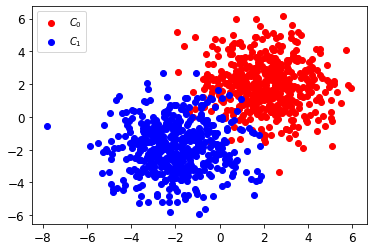

In [3]:
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.legend(loc='upper left')

Entrenemos una función discriminante y un modelo discriminativo:

In [4]:
from sklearn.linear_model import LogisticRegression, Perceptron
lr = LogisticRegression()
percep = Perceptron()

In [5]:
lr.fit(X,t)
percep.fit(X,t)

Perceptron()

Para el caso del Perceptron, tendremos una única función de decisión. El criterio usual es que si $y\geq0$, asigno a la clase $C_{1}$. Esto se puede modificar tal como vimos antes.

In [7]:
print(percep.decision_function(X[:1]))

[4.95109495]


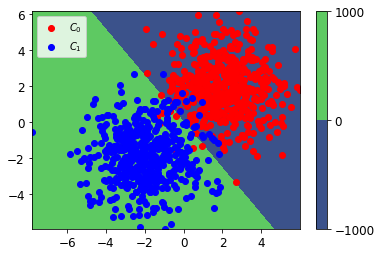

In [8]:
x1vals = np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2vals = np.linspace(np.min(X[:,1]),np.max(X[:,1]),100)
X1, X2 = np.meshgrid(x1vals,x2vals)
Xvals = np.array([X1.ravel(),X2.ravel()]).T
Z = percep.decision_function(Xvals).reshape(X1.shape)
plt.contourf(X1,X2,Z,levels=[-1000,0.0,1000])
plt.colorbar()
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.legend(loc='upper left')

Mientras que para el Regresor Logístico tendremos dos probabilidades que suman uno, por lo que puedo quedarme únicamente con la segunda columna. El criterio por defecto es poner el umbral en $p(C_{1}|x)\geq 0.5$.

In [9]:
print(lr.predict_proba(X[:1]))

[[0.06538928 0.93461072]]


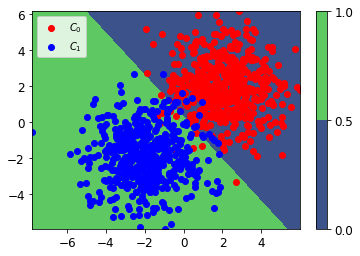

In [10]:
x1vals = np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2vals = np.linspace(np.min(X[:,1]),np.max(X[:,1]),100)
X1, X2 = np.meshgrid(x1vals,x2vals)
Xvals = np.array([X1.ravel(),X2.ravel()]).T
Z = lr.predict_proba(Xvals)[:,1].reshape(X1.shape)
plt.contourf(X1,X2,Z,levels=[0.0,0.5,1.0])
plt.colorbar()
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.legend(loc='upper left')

Vayamos ahora al caso multiclase:
- Tenemos las etiquetas, que pueden venir esencialmente en dos formas: {0,1,...,K-1},{[1,0,...,0],[0,1,0,...,0],...}. Para `sklearn`, con usar la primera estamos perfecto. Si codeamos a mano, hay que tener cuidado.
- Tenemos las predicciones. Acá es donde aparece la gran diferencia. ¿Qué entrenamos? 
- El primer enfoque es el de _uno contra el resto_. Para cada clase $K$, entreno un clasificador que aprenda a distinguir esa clase del resto. Tenemos entonces K clasificadores. Por ejemplo, para 4 clases: (0,123), (1,023), (2,013), (3,012). Uno asigna entonces una clase viendo como se intersectan las distintas regiones de los clasificadores. Eso introduce la posibilidad de regiones ambiguas. Además, el problema se puede volver muy desbalanceado. 
- El segundo enfoque es el de _uno contra uno_. En este enfoque, entreno un clasificador para cada combinación de dos clases. Tenemos entonces $\frac{K(K-1)}{2}$ clasificadores, uno por cada problema de dos clases. Por ejemplo, para 4 clases: (0,1), (0,2), (0,3), (1,2), (1,3), (2,3). Para asignar una clase, tomamos entonces el voto mayoritario. Es decir, cual es la clase que recibe más votos de cada uno de estos clasificadores. Esto también introduce ambigüedades.
- El tercer enfoque, que no asigna ambiguedades. Es aprender un único clasificador de $K$ clases. Para el caso de función discriminante, esto se logra aprendiendo K funciones $y_{k}$ al mismo tiempo, y asignando la clase como la que da el maximo $y_{k}$ entre todos. Las fronteras de decisión son entonces dadas por las regiones donde coinciden dos funciones. Se puede mostrar que con este criterio ya no hay ambigüedades. Para el caso de modelos discriminativos y generativos, esto es todavia más fácil. ¡Aprendemos $p(C_{k}|x)$ tal como antes! Ahora simplemente no simplificamos la clase redundante. Tampoco hay ambigüedades.

Cual de los tres enfoques usamos depende del algoritmo. En particular, hay algunos que no pueden utilizar el tercer enfoque y entonces aparece el problema. Noten que ahora escribi el criterio, mientras que antes siempre aclare que podiamos jugar con el umbral. Para el caso multiclase, el análisis que hicimos se vuelve más díficil. Para poder hacerlo, vamos a binarizar el problema.

Ejemplifiquemos con un caso de juguete:

In [11]:
from sklearn.datasets import make_blobs

gt_center = np.array([[3.0, 3.0],[-3.0, -3.0],[-3.0,3.0],[3.0,-3.0]])
X, t = make_blobs(1000, n_features=2, centers=gt_center, cluster_std=1.0, random_state=1234, )

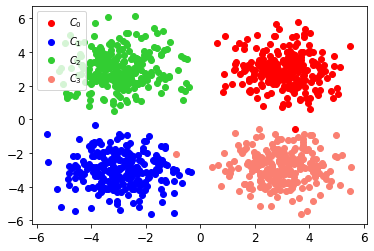

In [12]:
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[t==2,0],X[t==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[t==3,0],X[t==3,1],c='salmon', label='$C_{3}$')

plt.legend(loc='upper left')

Entrenemos una función discriminante y un modelo discriminativo:

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lr = LogisticRegression()
lda = LinearDiscriminantAnalysis(solver='lsqr')

In [14]:
lr.fit(X,t)
lda.fit(X,t)

LinearDiscriminantAnalysis(solver='lsqr')

Para el caso del LinearDiscriminantAnalysis, tendremos ahora cuatro funciones de decisión. 

In [15]:
print(lda.decision_function(X[:1]))

[[ -3.13427549 -18.79619805  -8.21778037 -11.90111461]]


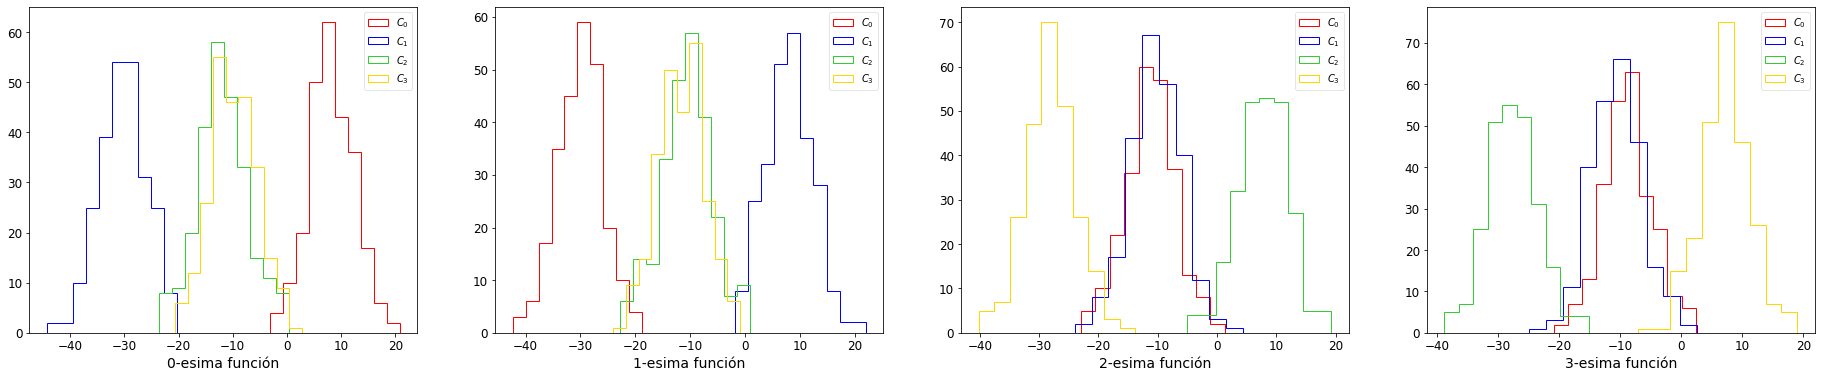

In [16]:
fig, ax = plt.subplots(1,4,figsize=(4*2*4,2*3))
for k in range(4):
    ax[k].hist(lda.decision_function(X)[t==0,k],histtype='step',color='red',label='$C_{0}$')
    ax[k].hist(lda.decision_function(X)[t==1,k],histtype='step',color='blue',label='$C_{1}$')
    ax[k].hist(lda.decision_function(X)[t==2,k],histtype='step',color='limegreen',label='$C_{2}$')
    ax[k].hist(lda.decision_function(X)[t==3,k],histtype='step',color='gold',label='$C_{3}$')
    ax[k].set_xlabel(str(k)+'-esima función')
    ax[k].legend(loc='upper right',framealpha=0.5)

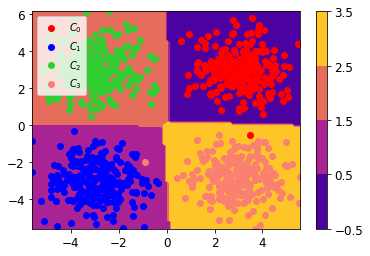

In [17]:
x1vals = np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2vals = np.linspace(np.min(X[:,1]),np.max(X[:,1]),100)
X1, X2 = np.meshgrid(x1vals,x2vals)
Xvals = np.array([X1.ravel(),X2.ravel()]).T
Z = np.argmax(lda.decision_function(Xvals),axis=1).reshape(X1.shape)
plt.contourf(X1,X2,Z,cmap='plasma',levels=[-0.5,0.5,1.5,2.5,3.5])
plt.colorbar()
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[t==2,0],X[t==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[t==3,0],X[t==3,1],c='salmon', label='$C_{3}$')
plt.legend(loc='upper left')

Mientras que para el Regresor Logístico tendremos cuatro probabilidades que suman uno.

In [21]:
print(lr.predict_proba(X[:1]))

[[8.75343203e-01 9.87611271e-05 1.09991086e-01 1.45669498e-02]]


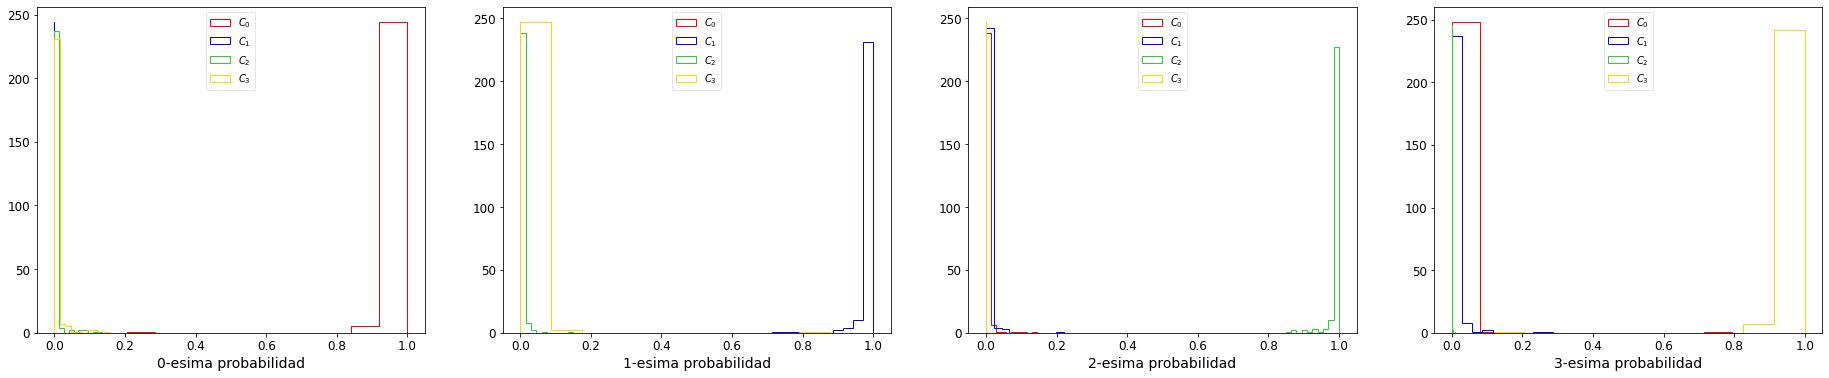

In [23]:
fig, ax = plt.subplots(1,4,figsize=(4*2*4,2*3))
for k in range(4):
    ax[k].hist(lr.predict_proba(X)[t==0,k],histtype='step',color='red',label='$C_{0}$')
    ax[k].hist(lr.predict_proba(X)[t==1,k],histtype='step',color='blue',label='$C_{1}$')
    ax[k].hist(lr.predict_proba(X)[t==2,k],histtype='step',color='limegreen',label='$C_{2}$')
    ax[k].hist(lr.predict_proba(X)[t==3,k],histtype='step',color='gold',label='$C_{3}$')
    ax[k].set_xlabel(str(k)+'-esima probabilidad')
    ax[k].legend(loc='upper center',framealpha=0.5)

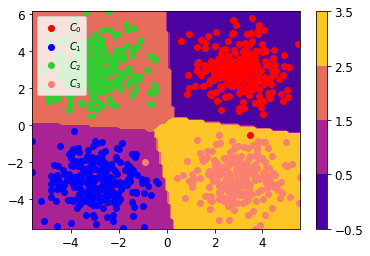

In [24]:
x1vals = np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2vals = np.linspace(np.min(X[:,1]),np.max(X[:,1]),100)
X1, X2 = np.meshgrid(x1vals,x2vals)
Xvals = np.array([X1.ravel(),X2.ravel()]).T
Z = np.argmax(lr.predict_proba(Xvals),axis=1).reshape(X1.shape)
plt.contourf(X1,X2,Z,cmap='plasma',levels=[-0.5,0.5,1.5,2.5,3.5])
plt.colorbar()
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[t==2,0],X[t==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[t==3,0],X[t==3,1],c='salmon', label='$C_{3}$')
plt.legend(loc='upper left')

En general, vamos a utilizar algoritmos que tengan el tercer enfoque para el problema multiclase. En ese caso, nos quedamos tranquilos de que tenemos una asignación clara basada en el criterio de maximización de función discrimiante / probabilidad posterior. Podemos construir las matriz de confusión y calcular la accuracy:

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(t,lr.predict(X)))
print(accuracy_score(t,lr.predict(X)))

[[249   0   0   1]
 [  0 250   0   0]
 [  0   0 250   0]
 [  0   1   0 249]]
0.998


Si queremos ver otras métricas nos encontramos con que están diseñadas para el caso binario. Una posibilidad es binarizar de antemano y entrenar un clasificador binario en efecto reduciendo el problema a alguno de los otros dos enfoques (como hicimos el Martes pasado!). Otra es aprovechar este clasificador entrenado a full y tomar simplemente distintos positivos y negativos. El gran problema viene si queremos mover el umbral. Las asignaciones se toman en cuenta tomando el máximo, por lo que el valor relativo es importante, no el absoluto. Eso conspira para que el analogo a mover el umbral en el caso binario no sea trivial.

In [28]:
from sklearn.metrics import precision_score, f1_score
for k in range(4):
    print('Clase '+str(k)+' contra todos')
    print(f1_score(np.where(t==k,1.0,0.0),np.where(lr.predict(X)==k,1.0,0.0)))

Clase 0 contra todos
0.9979959919839679
Clase 1 contra todos
0.998003992015968
Clase 2 contra todos
1.0
Clase 3 contra todos
0.996


Sin embargo, hay algoritmos que, en `sklearn`, no tienen incorporado este tercer criterio. Por ejemplo, el `Perceptron`, utiliza el _Uno contra todos_.

La clase pasada vimos las SVM. Para este algoritmo tampoco puede utilizarse fácilmente el buen enfoque ya que esta muy pensado para el caso binario. SVC tiene que elegir entonces entre los dos enfoques imperfectos. Por lo tanto, hace lo siguiente:
- `LinearSVC` resuelve el problema usando _uno contra todos_.  Se puede utilizar tambien el criterio `crammer_singer` que es parecido al tercer enfoque.
- `SVC` resuelve el problema usando _uno contra uno_. Sin embargo, y por compatibilidad, reporta la función de decisión como _uno contra todos_. Uno puede transformarla la función de decisión a _uno contra uno_ sin prolbema.

In [29]:
from sklearn.svm import LinearSVC, SVC
lsvc_1 = LinearSVC(loss='hinge', penalty='l2',C=10.0,max_iter=1000)
svc_1 = SVC(kernel='linear', C=10.0,decision_function_shape='ovr')
svc_2 = SVC(kernel='linear', C=10.0,decision_function_shape='ovo')

In [30]:
lsvc_1.fit(X,t)
svc_1.fit(X,t)
svc_2.fit(X,t)

/home/manuel/jupyter/jupyterenvironment/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


SVC(C=10.0, decision_function_shape='ovo', kernel='linear')

In [34]:
print(lsvc_1.decision_function(X[:1]).shape)
print(svc_1.decision_function(X[:1]).shape)
print(svc_2.decision_function(X[:1]).shape)

(1, 4)
(1, 4)
(1, 6)


Como estoy con `kernel=linear` puedo ver los coeficientes.

In [35]:
print(lsvc_1.coef_.shape) # (nclasses, ncoefs)
print(svc_1.coef_.shape) # (nclasses*(nclasses-1)/2, ncoefs)
print(svc_2.coef_.shape) # (nclasses*(nclasses-1)/2, ncoefs)

(4, 2)
(6, 2)
(6, 2)


En efecto, la forma de la función de decisión no cambia como aprende. Eso es siempre 'ovo'. El orden es de 0 a K-1 con “0 vs 1”, “0 vs 2” , … “0 vs K-1”, “1 vs 2”, “1 vs 3”, “1 vs K-1”, . . . “K-2 vs K-1”

In [196]:
print(np.allclose(svc_1.coef_,svc_2.coef_)) 

True


In [187]:
print(lsvc_1.decision_function(X[:1]),len(lsvc_1.decision_function(X[:1])[0]))
print(lsvc_1.predict(X[:1]))
print(svc_1.decision_function(X[:1]),len(svc_1.decision_function(X[:1])[0]))
print(svc_1.predict(X[:1]))
print(svc_2.decision_function(X[:1]),len(svc_2.decision_function(X[:1])[0]))
print(svc_2.predict(X[:1]))

[[ -1.76942724 -11.6022257   -3.53458947  -5.49358822]] 4
[0]
[[ 3.26875807 -0.31485508  2.28228002  1.29340438]] 4
[0]
[[  1.00000237   0.99979827   2.16213468  -5.73964319 -10.29957355
    0.78927807]] 6
[0]


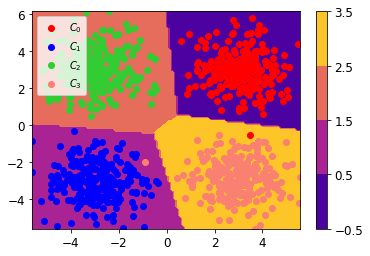

In [36]:
x1vals = np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2vals = np.linspace(np.min(X[:,1]),np.max(X[:,1]),100)
X1, X2 = np.meshgrid(x1vals,x2vals)
Xvals = np.array([X1.ravel(),X2.ravel()]).T
Z = lsvc_1.predict(Xvals).reshape(X1.shape)
plt.contourf(X1,X2,Z,cmap='plasma',levels=[-0.5,0.5,1.5,2.5,3.5])
plt.colorbar()
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[t==2,0],X[t==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[t==3,0],X[t==3,1],c='salmon', label='$C_{3}$')
plt.legend(loc='upper left')

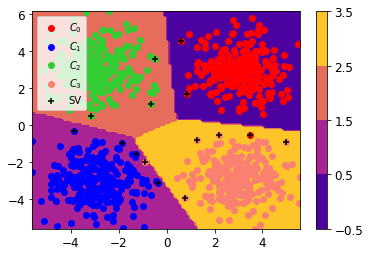

In [241]:
x1vals = np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2vals = np.linspace(np.min(X[:,1]),np.max(X[:,1]),100)
X1, X2 = np.meshgrid(x1vals,x2vals)
Xvals = np.array([X1.ravel(),X2.ravel()]).T
Z = svc_1.predict(Xvals).reshape(X1.shape)
plt.contourf(X1,X2,Z,cmap='plasma',levels=[-0.5,0.5,1.5,2.5,3.5])
plt.colorbar()
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[t==2,0],X[t==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[t==3,0],X[t==3,1],c='salmon', label='$C_{3}$')
plt.scatter(svc_1.support_vectors_[:,0],svc_1.support_vectors_[:,1],marker='+',color='black',label='SV')
plt.legend(loc='upper left')

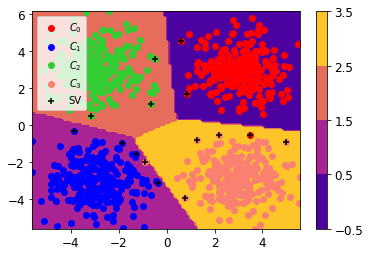

In [38]:
x1vals = np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2vals = np.linspace(np.min(X[:,1]),np.max(X[:,1]),100)
X1, X2 = np.meshgrid(x1vals,x2vals)
Xvals = np.array([X1.ravel(),X2.ravel()]).T
Z = svc_2.predict(Xvals).reshape(X1.shape)
plt.contourf(X1,X2,Z,cmap='plasma',levels=[-0.5,0.5,1.5,2.5,3.5])
plt.colorbar()
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[t==2,0],X[t==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[t==3,0],X[t==3,1],c='salmon', label='$C_{3}$')
plt.scatter(svc_2.support_vectors_[:,0],svc_2.support_vectors_[:,1],marker='+',color='black',label='SV')

plt.legend(loc='upper left')